In [1]:
#Packages and Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

In [2]:
#Import Data and combine into DataFrame
t1 = pd.read_csv("./transactions-1.csv")
t2 = pd.read_csv("./transactions-2.csv")
df = pd.concat([t1, t2], ignore_index=True)
df.head()

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,1,1,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,2,1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,3,1,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,4,1,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,5,1,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0


## Univariate Analysis - Histograms and Boxplots

### From the histogram plots we see the following:

##### Distributions:

uniformly distributed account_age_days

##### Skewed Right: 

Avg_Amount_User, Amount, Shipping_Distance_km

##### Outliers:

Outliers prsent in avg_amount_user, amount, shipping_distance_km

##### Class Imbalance

Class Imbalance is present (is_fraud)

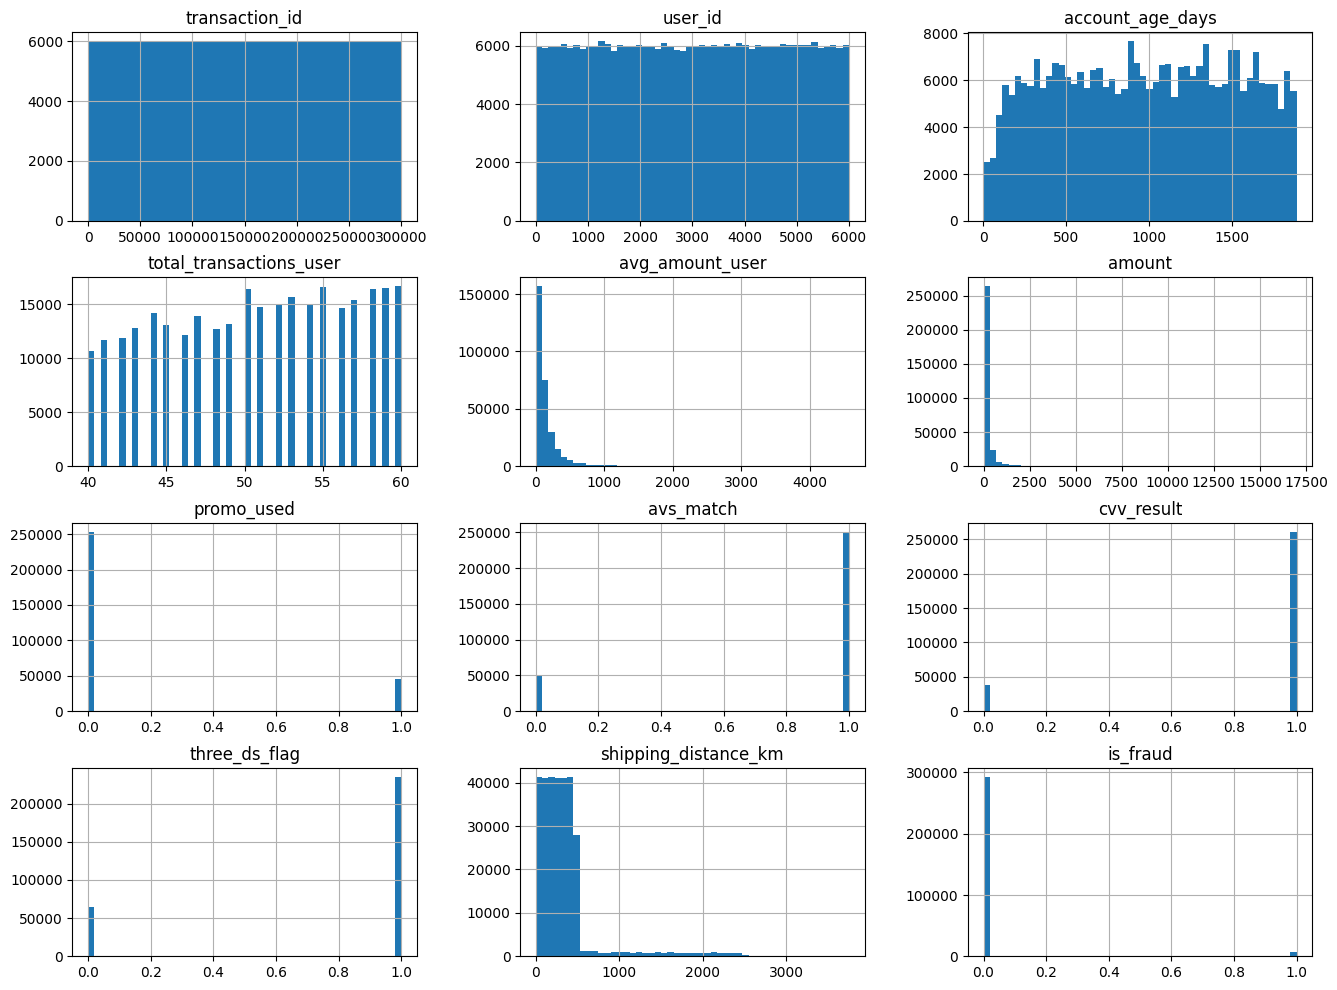

In [5]:
df.hist(bins=50, figsize=(16,12))
plt.show()

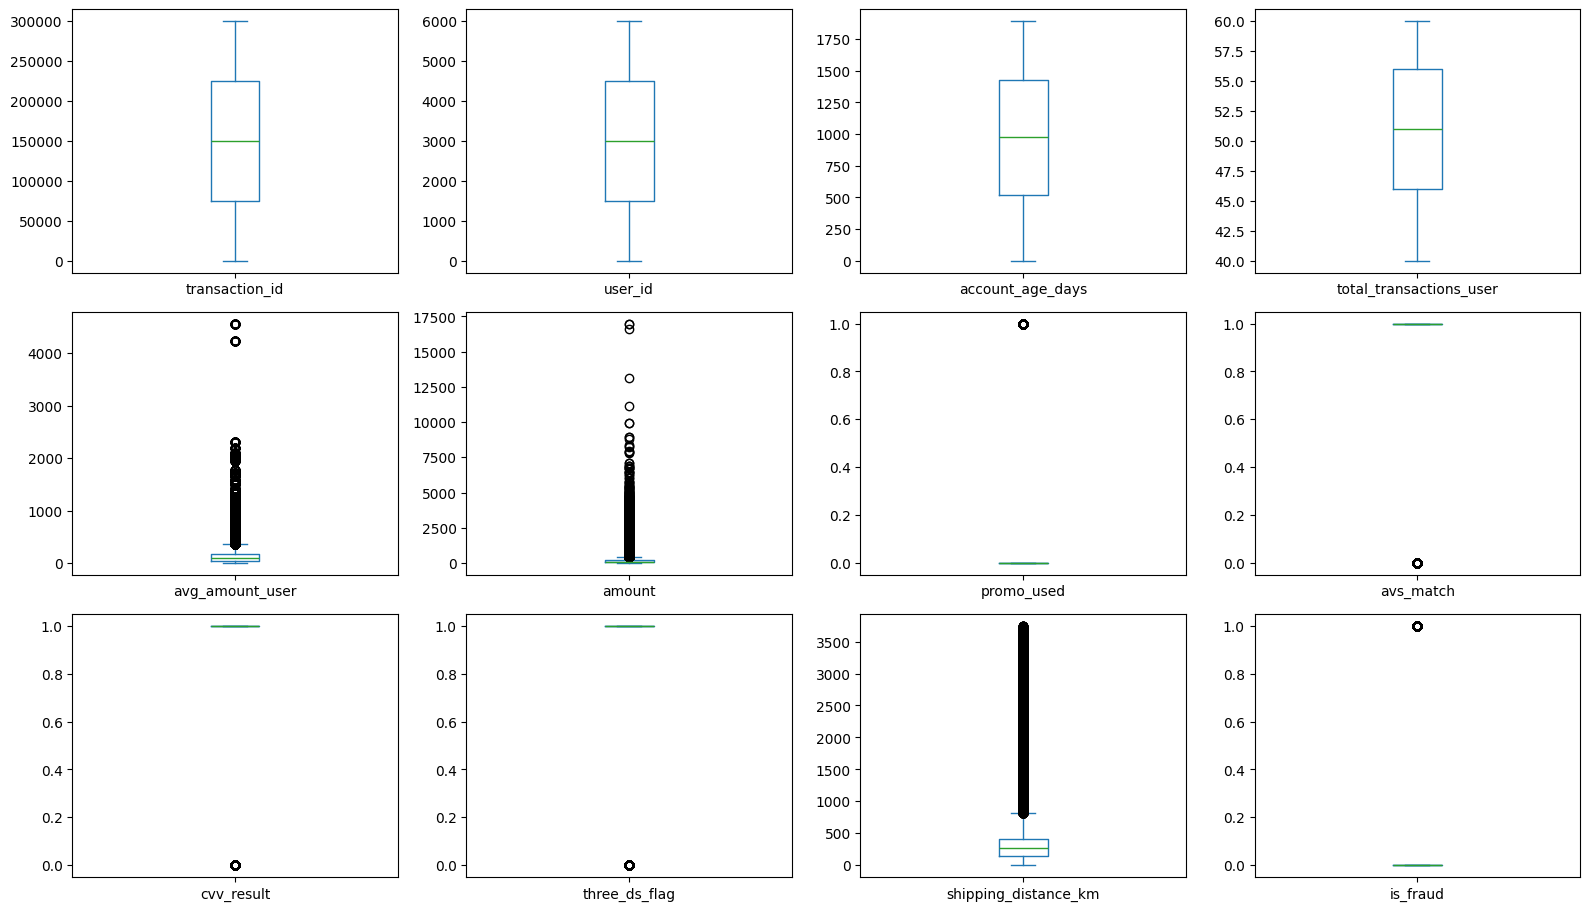

In [8]:
# Box Plots to review numerical distributions. 
df.plot(kind="box", subplots=True, layout=(4,4), figsize=(16,12), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

### Transform Numerical Columns

Log Transform avg_amount_user, amount, shipping_distance_dm